### Email Project
Hello,

I have some questions for you that I need to be answered before the board meeting Friday afternoon. I need to be able to speak to the following questions. I also need a single slide that I can incorporate into my existing presentation (Google Slides) that summarizes the most important points. My questions are listed below; however, if you discover anything else important that I didn’t think to ask, please include that as well.


- 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
- 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
- 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
- 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
- 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
- 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
- 7. Which lessons are least accessed?
- 8. Anything else I should be aware of?


Thank you,

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import env

In [2]:
# Read csv file into pandas DataFrame
#df = pd.read_csv("cohorts.csv")
#print('shape:', df.shape)
#df.head(5)

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/curriculum_logs'
query = 'SELECT * FROM logs'
# df = pd.read_sql('SELECT * FROM logs JOIN cohorts on logs.user_id = cohorts.id', url)
df = pd.read_sql(query, url)

In [3]:
df.head()

,date,time,path,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       900223 non-null  object 
 1   time       900223 non-null  object 
 2   path       900222 non-null  object 
 3   user_id    900223 non-null  int64  
 4   cohort_id  847330 non-null  float64
 5   ip         900223 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 41.2+ MB


In [5]:
df.cohort_id.isin([33,34,51]).sum()

100156

In [6]:
#df = df.drop(columns=['deleted_at'])

In [7]:
df.isnull().sum()

date             0
time             0
path             1
user_id          0
cohort_id    52893
ip               0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

date         0
time         0
path         0
user_id      0
cohort_id    0
ip           0
dtype: int64

In [10]:
df.date = pd.to_datetime(df.date)
df = df.set_index('date')
df.head()
#df.date = pd.to_datetime(df.date)
#df = df.set_index(df.date)

#df['date'] = df['date'] + '' + df['time']

,time,path,user_id,cohort_id,ip
date,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [11]:
df.path.value_counts().head()

/                           45854
javascript-i                18203
toc                         17591
search/search_index.json    17534
java-iii                    13166
Name: path, dtype: int64

In [12]:
# df.name.value_counts()

In [13]:
# df.path.value_counts(normalize=True).head()

In [14]:
df.cohort_id.value_counts()

28.0     84031
33.0     40730
29.0     38096
62.0     37109
53.0     36902
24.0     35636
57.0     33844
56.0     33568
51.0     32888
59.0     32015
22.0     30926
58.0     29855
32.0     29356
23.0     28534
52.0     28033
26.0     27749
34.0     26538
25.0     25586
31.0     25359
132.0    23691
55.0     21581
27.0     20743
61.0     17713
134.0    16623
135.0    16397
133.0    14715
14.0      9587
1.0       8890
137.0     8562
21.0      7444
138.0     7276
17.0      4954
13.0      2845
18.0      2158
8.0       1712
139.0     1672
19.0      1237
16.0       755
15.0       691
7.0        598
12.0       302
11.0       253
2.0         93
6.0         72
9.0          5
4.0          4
5.0          1
Name: cohort_id, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847329 entries, 2018-01-26 to 2021-04-21
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       847329 non-null  object 
 1   path       847329 non-null  object 
 2   user_id    847329 non-null  int64  
 3   cohort_id  847329 non-null  float64
 4   ip         847329 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 38.8+ MB


In [16]:
def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('proba'),
        left_index=True,
        right_index=True,
    )

In [17]:
rp_df = value_counts_and_frequencies(df.path)
rp_df.head()

,count,proba
/,45854,0.054116
javascript-i,18203,0.021483
toc,17591,0.020761
search/search_index.json,17534,0.020693
java-iii,13166,0.015538


<AxesSubplot:>

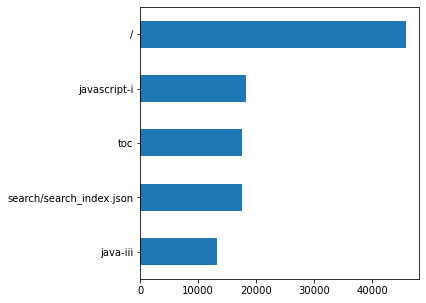

In [18]:
rp_df['count'].sort_values().tail(5).plot.barh(figsize=(5, 5))

In [19]:
cohort_given_path = (
    df.groupby('path')
    .cohort_id.value_counts(normalize=True)
    .rename('proba_status_given_path')
    .reset_index()
)
cohort_given_path.value_counts()

path                                     cohort_id  proba_status_given_path
%20https://github.com/RaulCPena          55.0       1.000000                   1
javascript-i/bom-and-dom                 11.0       0.000475                   1
javascript-i/arrays/manipulating         25.0       0.042043                   1
                                         26.0       0.041275                   1
                                         27.0       0.032252                   1
                                                                              ..
content/html-css/css-i/positioning.html  19.0       0.086957                   1
                                         22.0       0.086957                   1
                                         23.0       0.043478                   1
                                         27.0       0.043478                   1
wp-login                                 22.0       1.000000                   1
Length: 13565, dtype: int64

In [20]:
cohort_given_path[cohort_given_path.proba_status_given_path < 1]

,path,cohort_id,proba_status_given_path
4,.gitignore,24.0,0.500000
5,.gitignore,59.0,0.500000
7,/,28.0,0.138265
8,/,59.0,0.064989
9,/,24.0,0.045819
...,...,...,...
13556,web-design/ux/purpose,24.0,0.003922
13557,web-design/ux/purpose,25.0,0.003922
13558,web-design/ux/purpose,29.0,0.003922
13561,working-with-time-series-data,59.0,0.933333


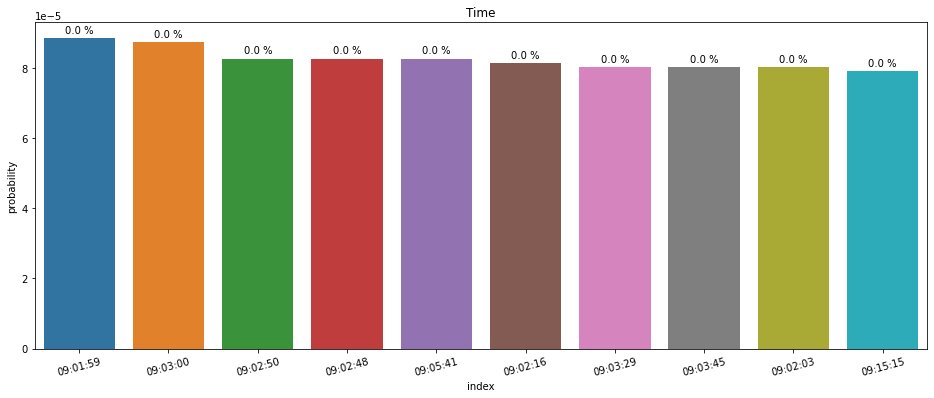

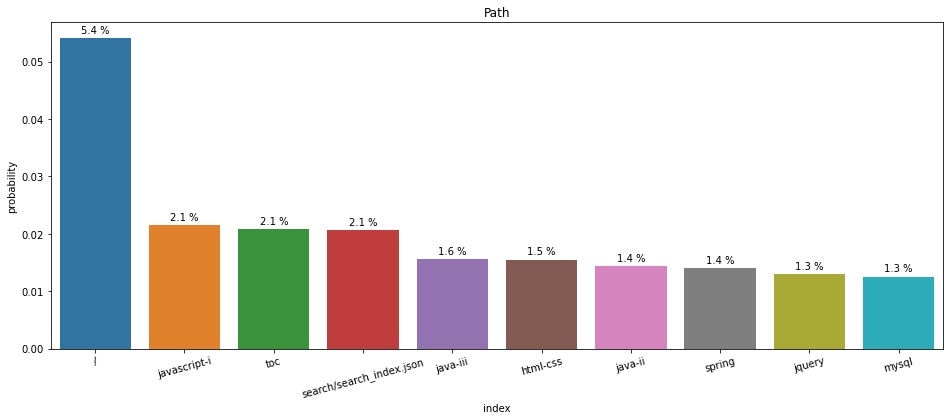

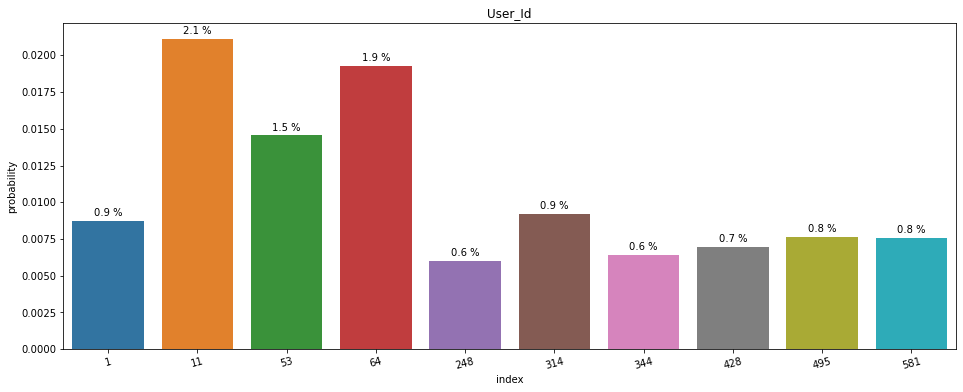

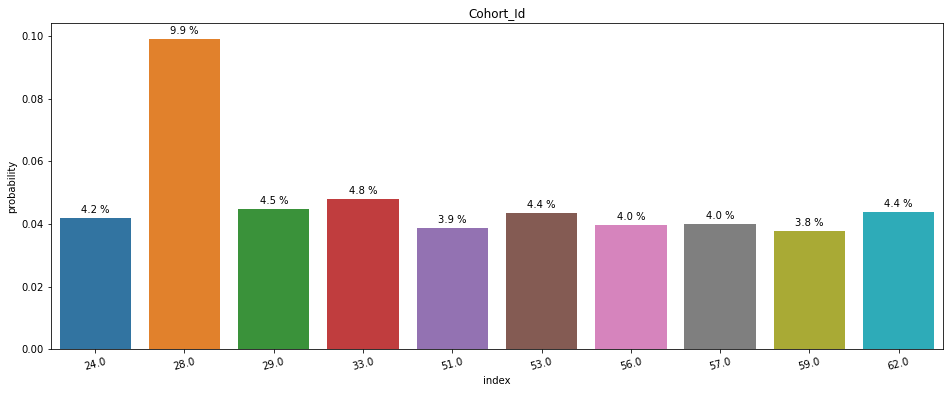

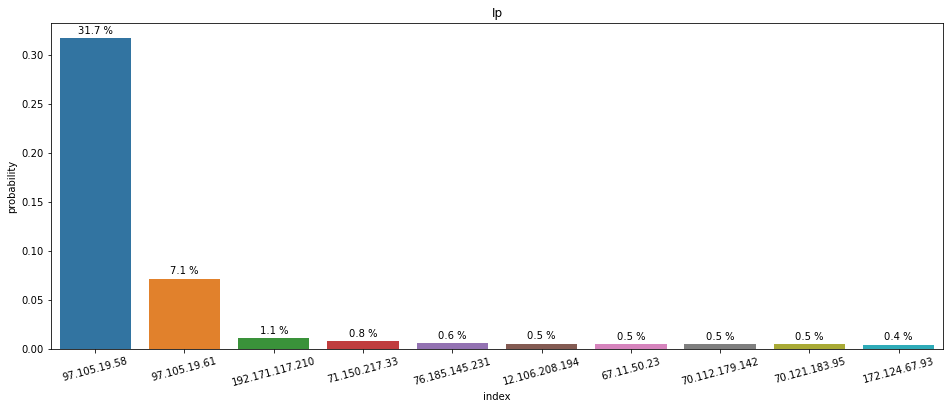

In [21]:
for col in df.columns:
    plt.figure(figsize=(16, 6))
    splot = sns.barplot(x='index', y=col, data=df[col].value_counts(normalize=True).reset_index().sort_values(
        by=col, ascending=False).head(10))
    for p in splot.patches:
        splot.annotate(format(p.get_height() * 100, '.1f') + ' %', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 8), 
                   textcoords = 'offset points')
    plt.xticks(rotation=15)
    plt.title(col.title())
    plt.ylabel('probability')
    plt.show()

In [22]:
cohort_given_path = (
    df.groupby('path')
    .cohort_id.value_counts(normalize=True)
    .rename('proba_status_given_path')
    .reset_index()
)
cohort_given_path.head

<bound method NDFrame.head of                                    path  cohort_id  proba_status_given_path
0       %20https://github.com/RaulCPena       55.0                 1.000000
1                                     '       28.0                 1.000000
2      ,%20https://github.com/RaulCPena       55.0                 1.000000
3                                  .git       24.0                 1.000000
4                            .gitignore       24.0                 0.500000
...                                 ...        ...                      ...
13560                             where      137.0                 1.000000
13561     working-with-time-series-data       59.0                 0.933333
13562     working-with-time-series-data       28.0                 0.066667
13563                          wp-admin       22.0                 1.000000
13564                          wp-login       22.0                 1.000000

[13565 rows x 3 columns]>

In [23]:
#df2 = df[["cohort_id", "name"]]


In [24]:
#df2.value_counts()

In [25]:
pd.read_sql('SELECT * FROM cohorts', url)

,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,1,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
1,2,Badlands,#badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
2,3,Carlsbad,#carlsbad,2014-09-04,2014-11-05,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
3,4,Denali,#denali,2014-10-20,2015-01-18,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
4,5,Everglades,#everglades,2014-11-18,2015-02-24,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
5,6,Franklin,#franklin,2015-02-03,2015-05-26,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
6,7,Glacier,#glacier,2015-06-05,2015-10-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
7,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1
8,9,Apollo,#apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,None,4
9,10,Balboa,#balboa,2015-11-03,2016-03-11,2016-06-14 19:52:26,2016-06-14 19:52:26,None,4


In [26]:
df = df[df.cohort_id.isin([59, 133, 137])]

In [27]:
cohort_requests = df.groupby('cohort_id').resample('W').size().unstack(0)
cohort_requests.head()

cohort_id,59.0,133.0,137.0
date,,,
2020-07-19,2881.0,NaN,NaN
2020-07-26,1854.0,NaN,NaN
2020-08-02,1932.0,NaN,NaN
2020-08-09,981.0,NaN,NaN
2020-08-16,904.0,NaN,NaN


<AxesSubplot:xlabel='date'>

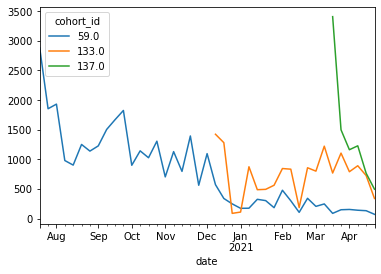

In [28]:
cohort_requests.plot()

In [29]:
K = 2
N = 5
s = cohort_requests.iloc[:, 0]
bands = pd.DataFrame()
std = s.rolling(N).std()
bands ['actual'] = s
bands ['mid'] = bands.actual.rolling(N).mean()
bands ['upper'] = bands.mid + K * std
bands ['lower'] = bands.mid - K * std
bands.head()

,actual,mid,upper,lower
date,,,,
2020-07-19,2881.0,NaN,NaN,NaN
2020-07-26,1854.0,NaN,NaN,NaN
2020-08-02,1932.0,NaN,NaN,NaN
2020-08-09,981.0,NaN,NaN,NaN
2020-08-16,904.0,1710.4,3329.763208,91.036792


Text(0, 0.5, 'number of requests')

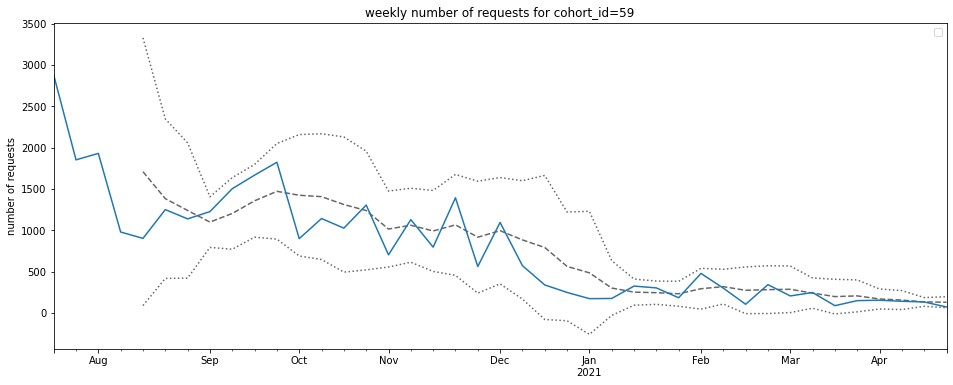

In [30]:
bands[['upper', 'lower']].plot(color='black', alpha=.6, ls=':', figsize=(16,6))
bands.mid.plot(color='black', alpha=.6, ls='--')
bands.actual.plot()
plt.legend('')
plt.xlabel('')
plt.title('weekly number of requests for cohort_id=59')
plt.ylabel('number of requests')

In [31]:
K = 2
N = 5
s = cohort_requests.iloc[:, 1]
bands = pd.DataFrame()
std = s.rolling(N).std()
bands ['actual'] = s
bands ['mid'] = bands.actual.rolling(N).mean()
bands ['upper'] = bands.mid + K * std
bands ['lower'] = bands.mid - K * std
bands.head()

,actual,mid,upper,lower
date,,,,
2020-07-19,NaN,NaN,NaN,NaN
2020-07-26,NaN,NaN,NaN,NaN
2020-08-02,NaN,NaN,NaN,NaN
2020-08-09,NaN,NaN,NaN,NaN
2020-08-16,NaN,NaN,NaN,NaN


Text(0, 0.5, 'number of requests')

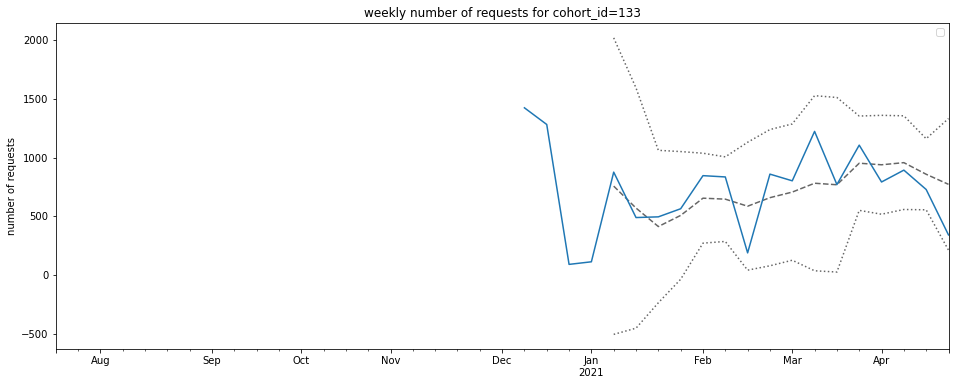

In [32]:
bands[['upper', 'lower']].plot(color='black', alpha=.6, ls=':', figsize=(16,6))
bands.mid.plot(color='black', alpha=.6, ls='--')
bands.actual.plot()
plt.legend('')
plt.xlabel('')
plt.title('weekly number of requests for cohort_id=133')
plt.ylabel('number of requests')

In [33]:
K = 2
N = 5
s = cohort_requests.iloc[:, 2]
bands = pd.DataFrame()
std = s.rolling(N).std()
bands ['actual'] = s
bands ['mid'] = bands.actual.rolling(N).mean()
bands ['upper'] = bands.mid + K * std
bands ['lower'] = bands.mid - K * std
bands.head()

,actual,mid,upper,lower
date,,,,
2020-07-19,NaN,NaN,NaN,NaN
2020-07-26,NaN,NaN,NaN,NaN
2020-08-02,NaN,NaN,NaN,NaN
2020-08-09,NaN,NaN,NaN,NaN
2020-08-16,NaN,NaN,NaN,NaN


Text(0, 0.5, 'number of requests')

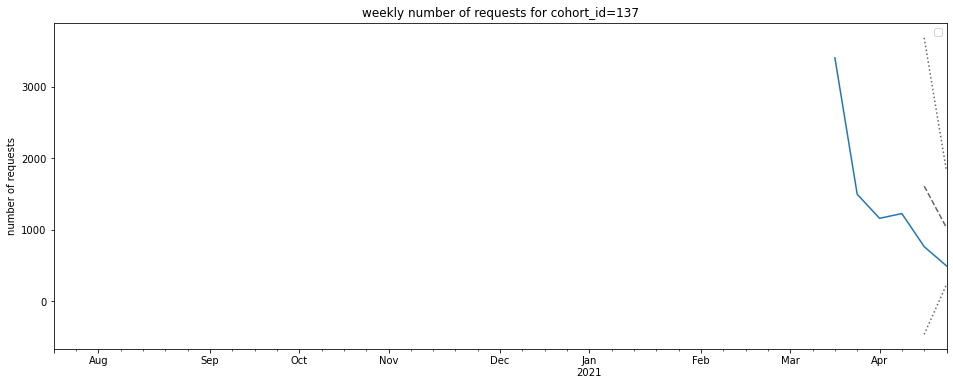

In [34]:
bands[['upper', 'lower']].plot(color='black', alpha=.6, ls=':', figsize=(16,6))
bands.mid.plot(color='black', alpha=.6, ls='--')
bands.actual.plot()
plt.legend('')
plt.xlabel('')
plt.title('weekly number of requests for cohort_id=137')
plt.ylabel('number of requests')